In [1]:
# For local execution (does not require installing the library):
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

# Prettymaps
from prettymaps import *
# Vsketch
import vsketch
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union

Text(520190.2079143001, 4003126.148909361, 'Nashville, Tennessee')

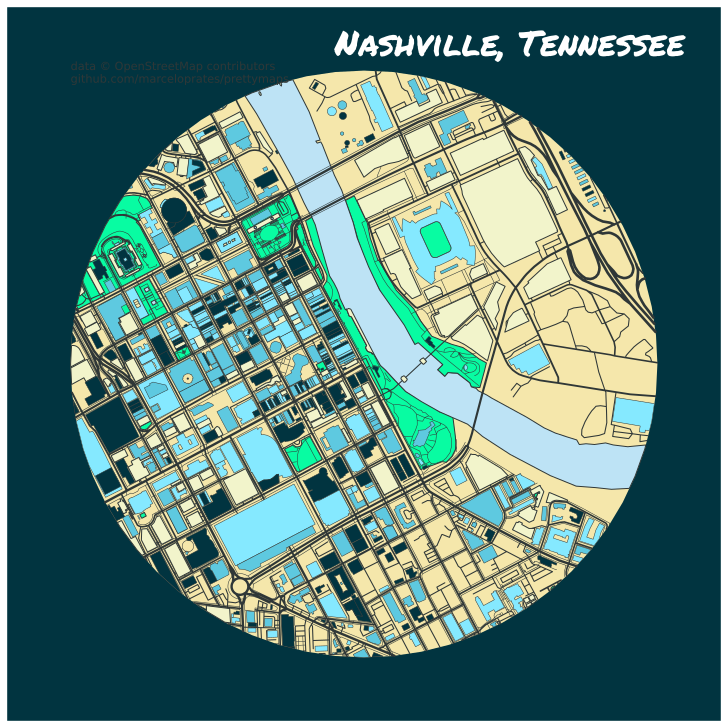

In [75]:
fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)

layers = plot(
    'Nashville, TN', radius = 1100,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = {
            'background': {'fc': '#013440', 'ec': '#013440', 'zorder': -1},
            'perimeter': {'fc': '#F5E7AB', 'ec': '#dadbc1', 'lw': 0, 'zorder': 0},
            'green': {'fc': '#08FCA2', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#08FCA2', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#BDE3F5', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#013440', '#85E9FF', '#5EC9E0'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        },

        osm_credit = {'color': '#2F3737'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
ax.set_xlim(xmin-.06*dx, xmax+.06*dx)
ax.set_ylim(ymin-.06*dy, ymax+.06*dy)

fontSize=35

# Draw top text
ax.text(
    xmax-.55*dx, ymax+fontSize+20,
    'Nashville, Tennessee',
    color = '#fff',
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = fontSize),
)